In [19]:
import pandas as pd

In [20]:
# Import Data Set
data=pd.read_csv("C:\\Users\\CHANDU\\Downloads\\NewspaperData.csv")

In [21]:
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [23]:
# Correlation
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

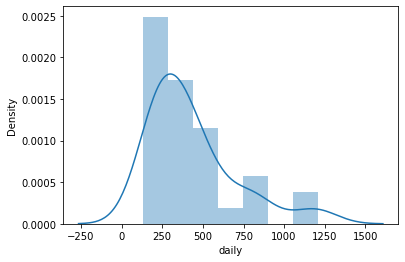

In [24]:
import seaborn as sns
sns.distplot(data['daily'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

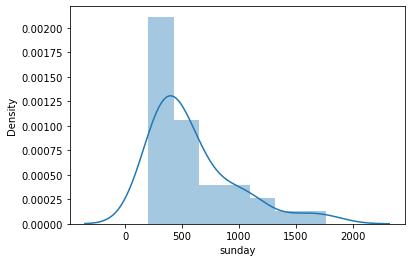

In [25]:
import seaborn as sns
sns.distplot(data['sunday'])

# "Fitting a Linear Regression Model"

In [26]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

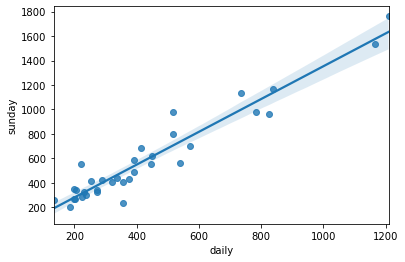

In [27]:
sns.regplot(x="daily", y="sunday", data=data);

In [28]:
#Coefficients
model.params
#params is parameters

Intercept    13.835630
daily         1.339715
dtype: float64

In [29]:
model.summary()
#gives entire model summary
# we can use x.params, y.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           6.02e-19
Time:                        20:04:32   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

model.summary gives C.I, t-value, p-value and it also compares pvalue with alpha

In [30]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [31]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

t-values check for actual Y values and predicted Y cap values and gives p-values to us.

the probability value(p-value) should compare with alpha value i.e 0.05

if p>0.05 not having significance is greater than alpha value i.e coefficients are not significant

if p<0.05 then we can say coefficients are significant

# Predict for new data point

In [32]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,30])

In [33]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [34]:
model.predict(data_pred)

0    281.778581
1     54.027073
dtype: float64